# Scenario Forum 2019: Citation Networks

This notebook contains the code for SSPs citation network as it grows. 


In [1]:
import pandas as pd
import metaknowledge as mk
import networkx as nx
import matplotlib.pyplot as plt
import community

from datetime import date
from collections import defaultdict
from matplotlib.offsetbox import AnchoredText

In [2]:
RC_ALL = mk.RecordCollection('SSP Citations/')
RC_2014 = mk.RecordCollection('SSP Citations/SSP 2014.txt')
RC_2015 = mk.RecordCollection('SSP Citations/SSP 2015.txt')
RC_2016 = mk.RecordCollection('SSP Citations/SSP 2016.txt')
RC_2017 = mk.RecordCollection('SSP Citations/SSP 2017.txt')
RC_2018 = mk.RecordCollection('SSP Citations/SSP 2018.txt')

In [3]:
# merge joins two RecordCollections into one
# merge: RecordCollection RecordCollection --> RecordCollection

def merge(RC1, RC2):
    NewRC = mk.RecordCollection()
    for R in RC1:
        NewRC.add(R)
    for R in RC2:
        NewRC.add(R)
    return NewRC

# sort_communities takes a dictionary where the keys are the nodes' labels and the values are their respective communities and returns a dictionary
# where each community is the key and the value is the list of nodes in that particular community.
# sort_communities: dictof(Str:Int) --> dictof(Int: listof(Str))

def sort_communities(partition):
    communities = {}
    for key, value in sorted(partition.items()):
        communities.setdefault(value, []).append(key)
    return communities

# add_communities adds the number of communities and a creation date to the graph statistics created by Metaknowledge
# add_communities: Str --> Str

def add_communities(title, stats, partition):
    number = len(sort_communities(partition))
    stats = ("\n" + title + "\n\n") + stats + ("\nCommunities: {}\n".format(number)) + "\nGenerated on: " + str(date.today())
    return stats

In [4]:
def noteLabelSlim(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.03, width=0.1,headwidth=3.5),
        xytext=xy_text, fontsize=myfontsize)
    return

def noteLabelSlimr(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='r', shrink=0.03, width=0.05,headwidth=3.5),
        xytext=xy_text, fontsize=myfontsize, color = 'r')
    return

In [5]:
RC14 = RC_2014
RC15 = merge(RC14, RC_2015)
RC16 = merge(RC15, RC_2016)
RC17 = merge(RC16, RC_2017)
RC18 = merge(RC17, RC_2018)

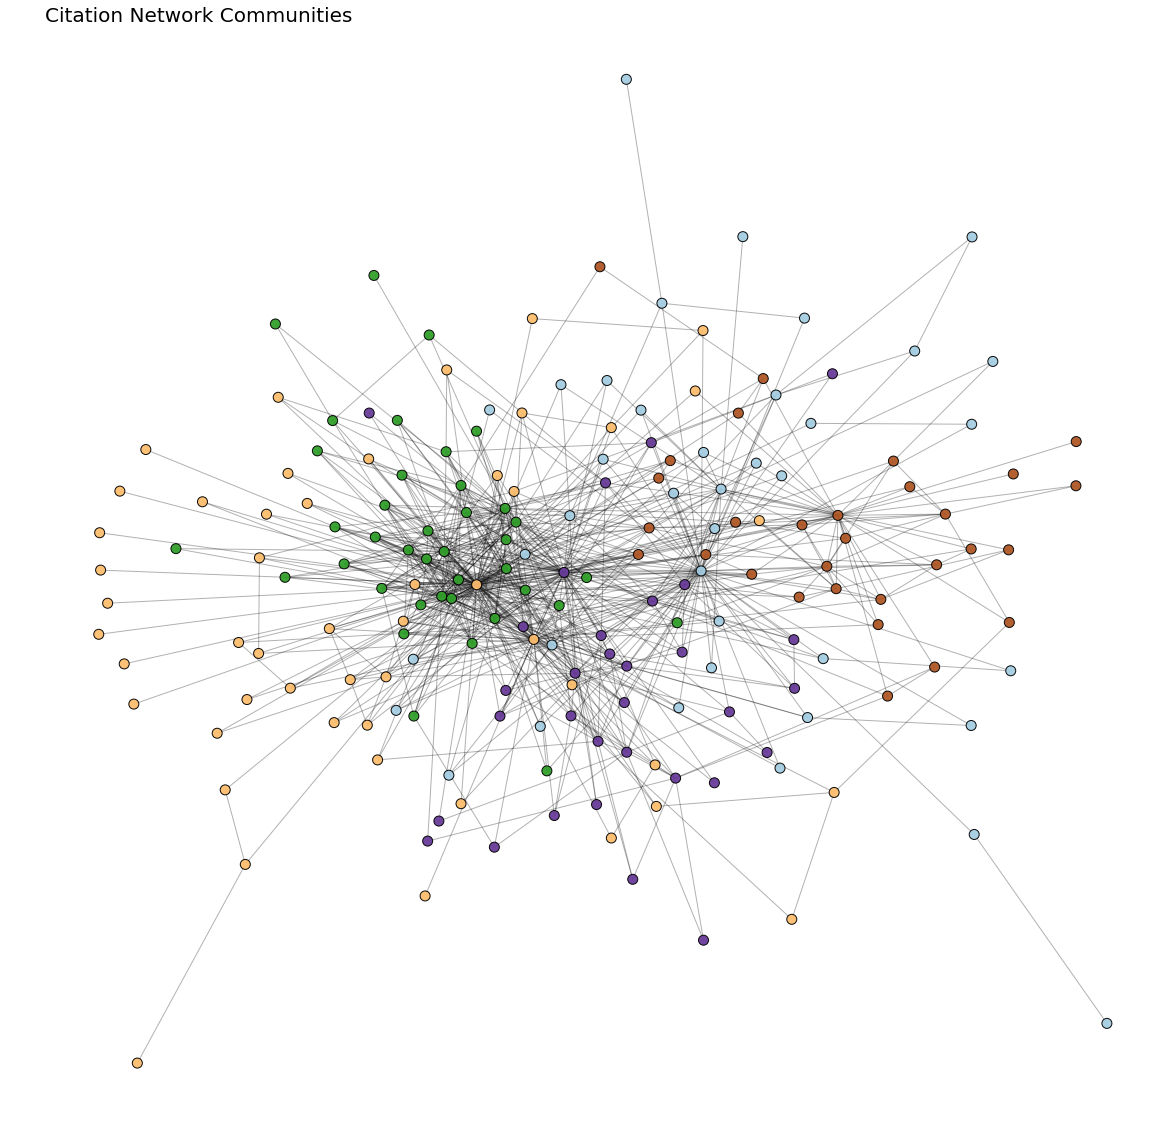

In [6]:
GA = RC_ALL.networkCitation(coreOnly=True)

mk.dropEdges(GA, minWeight = 1, dropSelfLoops = True)
GA.remove_nodes_from(list(nx.isolates(GA)))

GAu = GA.to_undirected()
GAu_giant = max(nx.connected_component_subgraphs(GAu), key=len)
partition = community.best_partition(GAu)

colors = [partition[n] for n in GAu_giant.nodes()]
my_colors = plt.cm.Paired

plt.figure(figsize=(20,20))
plt.axis('off')

layout = nx.spring_layout(GAu_giant, random_state=7)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= colors, cmap = my_colors, node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(GAu_giant, layout, edge_color='k',width=1, alpha=0.3)

#stats = add_communities("Citation Network 2018", mk.graphStats(GAu), partition)
plt.title("Citation Network Communities", fontsize=20, loc='left')

plt.savefig("./Graphs/SF2019_CitationNetwork-Communities.png", bbox_inches="tight")

plt.show()

In [7]:
eig = nx.eigenvector_centrality(GAu_giant)
bet = nx.betweenness_centrality(GAu_giant)
deg = nx.degree_centrality(GAu_giant)
cent_df = pd.DataFrame.from_dict([eig, bet, deg, partition])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Eigenvector', 'Betweenness', 'Degree', 'Community']
cent_df['Community'] = cent_df['Community'].astype(int)

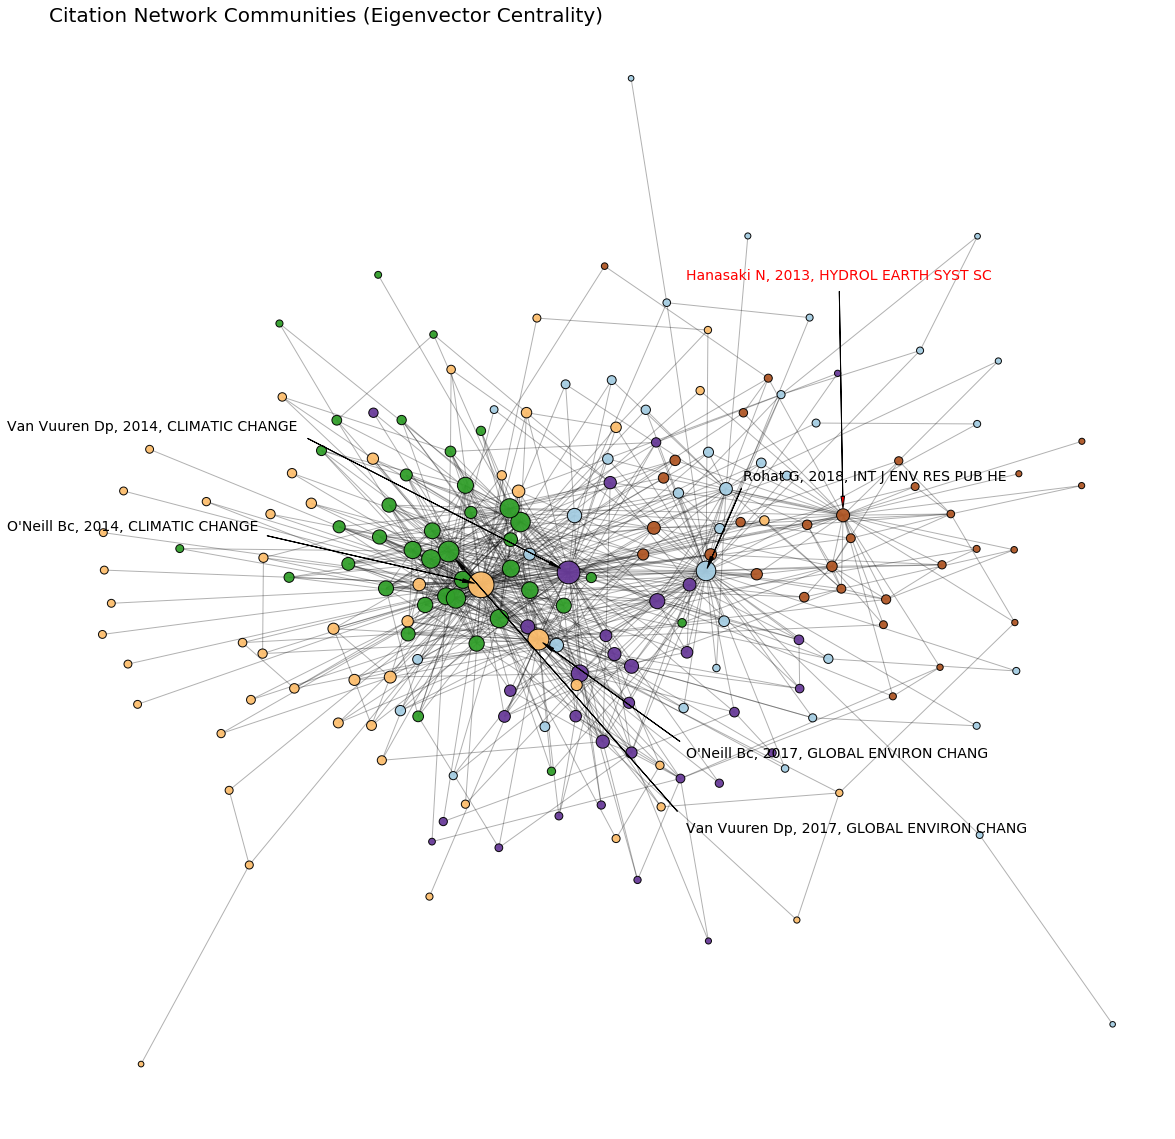

In [8]:
eig_size = [30+1800*eig[n] for n in GAu_giant.nodes()]

plt.figure(figsize=(20,20))
plt.axis('off')

layout = nx.spring_layout(GAu_giant, random_state=7)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= colors, cmap = my_colors, node_size=eig_size, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(GAu_giant, layout, edge_color='k',width=1, alpha=0.3)

#stats = add_communities("Citation Network 2018", mk.graphStats(GAu), partition)
plt.title("Citation Network Communities (Eigenvector Centrality)", fontsize=20, loc='left')

my_fontsize = 14
noteLabelSlim("O'Neill Bc, 2014, CLIMATIC CHANGE", (-0.8,0.1), my_fontsize)
noteLabelSlim('Van Vuuren Dp, 2014, CLIMATIC CHANGE', (-0.8,0.3), my_fontsize)
noteLabelSlim("O'Neill Bc, 2017, GLOBAL ENVIRON CHANG", (0.15,-0.35), my_fontsize)
noteLabelSlim('Van Vuuren Dp, 2017, GLOBAL ENVIRON CHANG', (0.15,-0.5), my_fontsize)
noteLabelSlim('Rohat G, 2018, INT J ENV RES PUB HE', (0.23,0.2), my_fontsize)
noteLabelSlimr('Hanasaki N, 2013, HYDROL EARTH SYST SC', (0.15,0.6), my_fontsize)

plt.savefig("./Graphs/SF2019_CitationNetwork-Communities-labels.png", bbox_inches="tight")

plt.show()

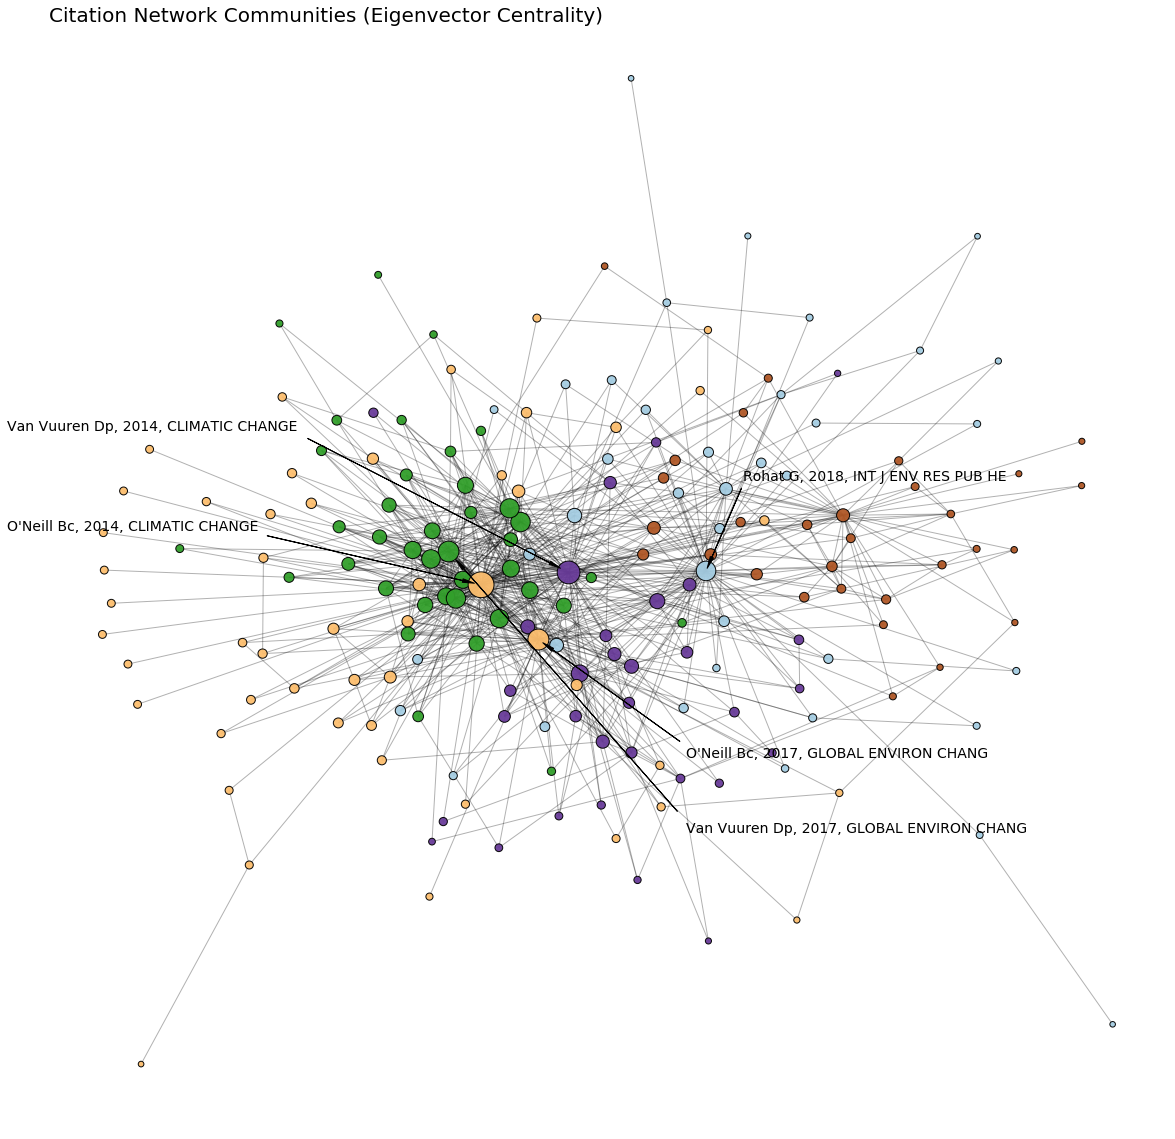

In [9]:
plt.figure(figsize=(20,20))
plt.axis('off')

layout = nx.spring_layout(GAu_giant, random_state=7)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= colors, cmap = my_colors, node_size=eig_size, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(GAu_giant, layout, edge_color='k',width=1, alpha=0.3)

#stats = add_communities("Citation Network 2018", mk.graphStats(GAu), partition)
plt.title("Citation Network Communities (Eigenvector Centrality)", fontsize=20, loc='left')

my_fontsize = 14
noteLabelSlim("O'Neill Bc, 2014, CLIMATIC CHANGE", (-0.8,0.1), my_fontsize)
noteLabelSlim('Van Vuuren Dp, 2014, CLIMATIC CHANGE', (-0.8,0.3), my_fontsize)
noteLabelSlim("O'Neill Bc, 2017, GLOBAL ENVIRON CHANG", (0.15,-0.35), my_fontsize)
noteLabelSlim('Van Vuuren Dp, 2017, GLOBAL ENVIRON CHANG', (0.15,-0.5), my_fontsize)
noteLabelSlim('Rohat G, 2018, INT J ENV RES PUB HE', (0.23,0.2), my_fontsize)
#noteLabelSlimr('Hanasaki N, 2013, HYDROL EARTH SYST SC', (0.15,0.6), my_fontsize)

plt.savefig("./Graphs/SF2019_CitationNetwork-Communities-labels1.png", bbox_inches="tight")

plt.show()

In [10]:
cent_df.sort_values('Eigenvector',ascending=False).head(10)

,Eigenvector,Betweenness,Degree,Community
"O'Neill Bc, 2014, CLIMATIC CHANGE",0.354359,0.419254,0.582011,2
"Van Vuuren Dp, 2014, CLIMATIC CHANGE",0.271896,0.116790,0.328042,3
"O'Neill Bc, 2017, GLOBAL ENVIRON CHANG",0.227932,0.094874,0.259259,2
"Van Vuuren Dp, 2017, GLOBAL ENVIRON CHANG",0.220660,0.022348,0.190476,1
"Rohat G, 2018, INT J ENV RES PUB HE",0.195786,0.198961,0.322751,0
"Riahi K, 2017, GLOBAL ENVIRON CHANG",0.194186,0.052686,0.211640,1
"Kriegler E, 2017, GLOBAL ENVIRON CHANG",0.191280,0.006579,0.142857,1
"Fujimori S, 2017, GLOBAL ENVIRON CHANG",0.187883,0.034106,0.174603,1
"Calvin K, 2017, GLOBAL ENVIRON CHANG",0.175255,0.004504,0.121693,1
"Dellink R, 2017, GLOBAL ENVIRON CHANG",0.169399,0.023331,0.153439,1


In [11]:
cent_df.sort_values('Betweenness',ascending=False).head(10)

,Eigenvector,Betweenness,Degree,Community
"O'Neill Bc, 2014, CLIMATIC CHANGE",0.354359,0.419254,0.582011,2
"Rohat G, 2018, INT J ENV RES PUB HE",0.195786,0.198961,0.322751,0
"Van Vuuren Dp, 2014, CLIMATIC CHANGE",0.271896,0.116790,0.328042,3
"O'Neill Bc, 2017, GLOBAL ENVIRON CHANG",0.227932,0.094874,0.259259,2
"Hanasaki N, 2013, HYDROL EARTH SYST SC",0.077498,0.075986,0.174603,4
"Riahi K, 2017, GLOBAL ENVIRON CHANG",0.194186,0.052686,0.211640,1
"Jones B, 2016, ENVIRON RES LETT",0.072695,0.036317,0.121693,0
"Fujimori S, 2017, GLOBAL ENVIRON CHANG",0.187883,0.034106,0.174603,1
"Ebi Kl, 2014, CLIMATIC CHANGE",0.143265,0.026684,0.153439,3
"Kriegler E, 2014, CLIMATIC CHANGE",0.142873,0.025110,0.153439,1


In [12]:
cent_df.sort_values('Degree',ascending=False).head(10)

,Eigenvector,Betweenness,Degree,Community
"O'Neill Bc, 2014, CLIMATIC CHANGE",0.354359,0.419254,0.582011,2
"Van Vuuren Dp, 2014, CLIMATIC CHANGE",0.271896,0.116790,0.328042,3
"Rohat G, 2018, INT J ENV RES PUB HE",0.195786,0.198961,0.322751,0
"O'Neill Bc, 2017, GLOBAL ENVIRON CHANG",0.227932,0.094874,0.259259,2
"Riahi K, 2017, GLOBAL ENVIRON CHANG",0.194186,0.052686,0.211640,1
"Van Vuuren Dp, 2017, GLOBAL ENVIRON CHANG",0.220660,0.022348,0.190476,1
"Hanasaki N, 2013, HYDROL EARTH SYST SC",0.077498,0.075986,0.174603,4
"Fujimori S, 2017, GLOBAL ENVIRON CHANG",0.187883,0.034106,0.174603,1
"Dellink R, 2017, GLOBAL ENVIRON CHANG",0.169399,0.023331,0.153439,1
"Kriegler E, 2014, CLIMATIC CHANGE",0.142873,0.025110,0.153439,1


In [13]:
mk.graphStats(GAu)

'Nodes: 190\nEdges: 761\nIsolates: 0\nSelf loops: 0\nDensity: 0.0423837\nTransitivity: 0.180331'

In [14]:
grp0 = [n for n in partition if partition[n]==0]
grp1 = [n for n in partition if partition[n]==1]
grp2 = [n for n in partition if partition[n]==2]
grp3 = [n for n in partition if partition[n]==3]
grp4 = [n for n in partition if partition[n]==4]
grp5 = [n for n in partition if partition[n]==5]
grp6 = [n for n in partition if partition[n]==6]

In [15]:
grp0

['Lehner F, 2015, NAT CLIM CHANGE',
 'Chen K, 2017, ENVIRON POLLUT',
 'Jones B, 2016, ENVIRON RES LETT',
 'Zhang D, 2017, RESOUR CONSERV RECY',
 'Jiang Lw, 2017, GLOBAL ENVIRON CHANG',
 'Rohat G, 2018, INT J ENV RES PUB HE',
 'Anderson Gb, 2018, CLIMATIC CHANGE',
 'Coffel Ed, 2018, ENVIRON RES LETT',
 'Davenport F, 2017, GLOBAL ENVIRON CHANG',
 'Dong Wh, 2015, CLIMATIC CHANGE',
 'Ebi Kl, 2014, ENVIRONMENT',
 'Hoornweg D, 2017, ENVIRON URBAN',
 'Hunter Lm, 2014, POPUL ENVIRON',
 'Kamei M, 2016, SUSTAIN CITIES SOC',
 'Knorr W, 2016, NAT CLIM CHANGE',
 'Knorr W, 2017, ATMOS CHEM PHYS',
 'Lutz W, 2017, NAT CLIM CHANGE',
 'Marsha A, 2018, CLIMATIC CHANGE',
 'Matthews Tkr, 2017, P NATL ACAD SCI USA',
 'Mishra V, 2017, ENVIRON RES LETT',
 'Monaghan Aj, 2018, CLIMATIC CHANGE',
 'Mora C, 2017, NAT CLIM CHANGE',
 'Parkinson Sc, 2016, ENVIRON MODELL SOFTW',
 'Rozell D, 2017, CLIMATIC CHANGE',
 'Samir Kc, 2017, GLOBAL ENVIRON CHANG',
 'Samir Kc, 2014, POPUL ENVIRON',
 'Velders Gjm, 2015, ATMOS ENV

In [16]:
grp1

['Rao S, 2017, GLOBAL ENVIRON CHANG',
 'Bauer N, 2017, GLOBAL ENVIRON CHANG',
 'Calvin K, 2017, GLOBAL ENVIRON CHANG',
 'Fricko O, 2017, GLOBAL ENVIRON CHANG',
 'Kriegler E, 2017, GLOBAL ENVIRON CHANG',
 'Popp A, 2017, GLOBAL ENVIRON CHANG',
 'Riahi K, 2017, GLOBAL ENVIRON CHANG',
 'Kriegler E, 2014, CLIMATIC CHANGE',
 'Dellink R, 2017, GLOBAL ENVIRON CHANG',
 'Leimbach M, 2017, GLOBAL ENVIRON CHANG',
 'Mori S, 2018, SUSTAIN SCI',
 'Fujimori S, 2017, GLOBAL ENVIRON CHANG',
 'Fujimori S, 2015, ENERG ECON',
 'Rogelj J, 2018, NAT CLIM CHANGE',
 'Su Xm, 2017, EARTHS FUTURE',
 'Van Vuuren Dp, 2017, GLOBAL ENVIRON CHANG',
 'Chowdhury S, 2018, NAT COMMUN',
 'Dai Hc, 2017, ADV CLIM CHANG RES',
 'Ritchie J, 2018, ENVIRON RES LETT',
 'Bauer N, 2016, ENERGY',
 'Ritchie J, 2017, ENERGY',
 'Hof Af, 2017, ENVIRON SCI POLICY',
 'Gidden Mj, 2018, ENVIRON MODELL SOFTW',
 'Fujimori S, 2016, SPRINGERPLUS',
 'Lamontagne Jr, 2018, EARTHS FUTURE',
 'Van Vuuren Dp, 2018, NAT CLIM CHANGE',
 'Doelman Jc, 2018,

In [17]:
grp2

["O'Neill Bc, 2014, CLIMATIC CHANGE",
 'Wang M, 2016, J HYDROL',
 'He Cy, 2017, J CLEAN PROD',
 "O'Neill Bc, 2017, GLOBAL ENVIRON CHANG",
 'Broin Eo, 2017, TRANSPORT RES D-TR E',
 'Bijl Dl, 2017, GLOBAL ENVIRON CHANG',
 'Alfieri L, 2016, CLIMATIC CHANGE',
 'Bohmelt T, 2017, ENVIRON SCI POLICY',
 'Jongman B, 2015, P NATL ACAD SCI USA',
 'Wiebe K, 2015, ENVIRON RES LETT',
 'Rao Nd, 2018, WIRES CLIM CHANGE',
 'Blanco V, 2017, J ENVIRON MANAGE',
 'Engstrom K, 2016, EARTH SYST DYNAM',
 'Hegre H, 2016, ENVIRON RES LETT',
 'Deetman S, 2018, ENVIRON SCI TECHNOL',
 'Van Ruijven Bj, 2016, RESOUR CONSERV RECY',
 'Kinoshita Y, 2018, ENVIRON RES LETT',
 'Brown Me, 2017, FOOD POLICY',
 'Carrara S, 2017, TRANSPORT RES D-TR E',
 'Edelenbosch Oy, 2017, TRANSPORT RES D-TR E',
 'Liu Jy, 2016, ENVIRON RES LETT',
 'Hofstra N, 2016, INT J HYG ENVIR HEAL',
 'Sanchez-Arcilla A, 2016, SCI TOTAL ENVIRON',
 'Mundaca L, 2016, APPL ENERG',
 'Duku C, 2018, SCI TOTAL ENVIRON',
 'Alfieri L, 2015, GLOBAL ENVIRON CHANG

In [18]:
grp3

['Van Vuuren Dp, 2014, CLIMATIC CHANGE',
 'Scasny M, 2015, ENVIRON RESOUR ECON',
 'Ebi Kl, 2014, CLIMATIC CHANGE',
 'Hasegawa T, 2015, ENVIRON RES LETT',
 'Absar Sm, 2015, GLOBAL ENVIRON CHANG',
 'Birkmann J, 2015, CLIMATIC CHANGE',
 'Ebi Kl, 2014, INT J ENV RES PUB HE',
 'Guivarch C, 2016, ENVIRON MODELL SOFTW',
 'Marangoni G, 2017, NAT CLIM CHANGE',
 'Maury O, 2017, GLOBAL ENVIRON CHANG',
 'Merkens Jl, 2016, GLOBAL PLANET CHANGE',
 'Nakicenovic N, 2014, CLIMATIC CHANGE',
 'Nilsson Ae, 2017, GLOBAL ENVIRON CHANG',
 'Palazzo A, 2017, GLOBAL ENVIRON CHANG',
 'Reimann L, 2018, REG ENVIRON CHANGE',
 'Schweizer Vj, 2014, CLIMATIC CHANGE',
 'Suk Je, 2016, WIRES CLIM CHANGE',
 'Van Ruijven Bj, 2014, CLIMATIC CHANGE',
 'Wilbanks Tj, 2014, CLIMATIC CHANGE',
 'Lane L, 2014, CLIMATIC CHANGE',
 'Rothman Ds, 2014, CLIMATIC CHANGE',
 'Rozenberg J, 2014, CLIMATIC CHANGE',
 'Iyer G, 2017, NAT CLIM CHANGE',
 'Distefano T, 2017, ECOL ECON',
 'Van Ruijven Bj, 2016, ENERG ECON',
 'Dueri S, 2016, GLOBAL E

In [19]:
grp4

['Arnell Nw, 2014, CLIMATIC CHANGE',
 'Hanasaki N, 2013, HYDROL EARTH SYST SC',
 'Ishida H, 2014, ENVIRON RES LETT',
 'Koutroulis Ag, 2018, SCI TOTAL ENVIRON',
 'Mouratiadou I, 2016, ENVIRON SCI POLICY',
 'Veldkamp Tie, 2016, ENVIRON RES LETT',
 'Wada Y, 2016, GEOSCI MODEL DEV',
 'Yao Mt, 2017, ENVIRON PROCESS',
 'Fujimori S, 2017, SUSTAIN SCI',
 'Nazemi A, 2015, HYDROL EARTH SYST SC',
 'Bonsch M, 2016, GCB BIOENERGY',
 'Gao L, 2017, WATER-SUI',
 'Hanasaki N, 2016, HYDROL EARTH SYST SC',
 'Zhou Q, 2018, CLIMATIC CHANGE',
 'Byers E, 2018, ENVIRON RES LETT',
 'Satoh Y, 2017, EARTHS FUTURE',
 'Wada Y, 2014, ENVIRON RES LETT',
 'Nechifor V, 2017, WATER RESOUR ECON',
 'Yamagata Y, 2018, SUSTAIN SCI',
 'Hejazi Mi, 2015, P NATL ACAD SCI USA',
 'Susnik J, 2018, RESOUR CONSERV RECY',
 'Zhuo L, 2016, ENVIRON INT',
 'Mankin Js, 2017, ENVIRON RES LETT',
 'Liu L, 2018, ENVIRON RES LETT',
 'Van Vliet Mth, 2016, GLOBAL ENVIRON CHANG',
 'Neverre N, 2016, WATER ECON POLICY',
 'Neverre N, 2015, WATER RE

In [20]:
grp5

[]

In [21]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='2014')
blue_patch = mpatches.Patch(color='blue', label='2015')
green_patch = mpatches.Patch(color='green', label='2016')
brown_patch = mpatches.Patch(color='brown', label='2017')
khaki_patch = mpatches.Patch(color='khaki', label='2018')

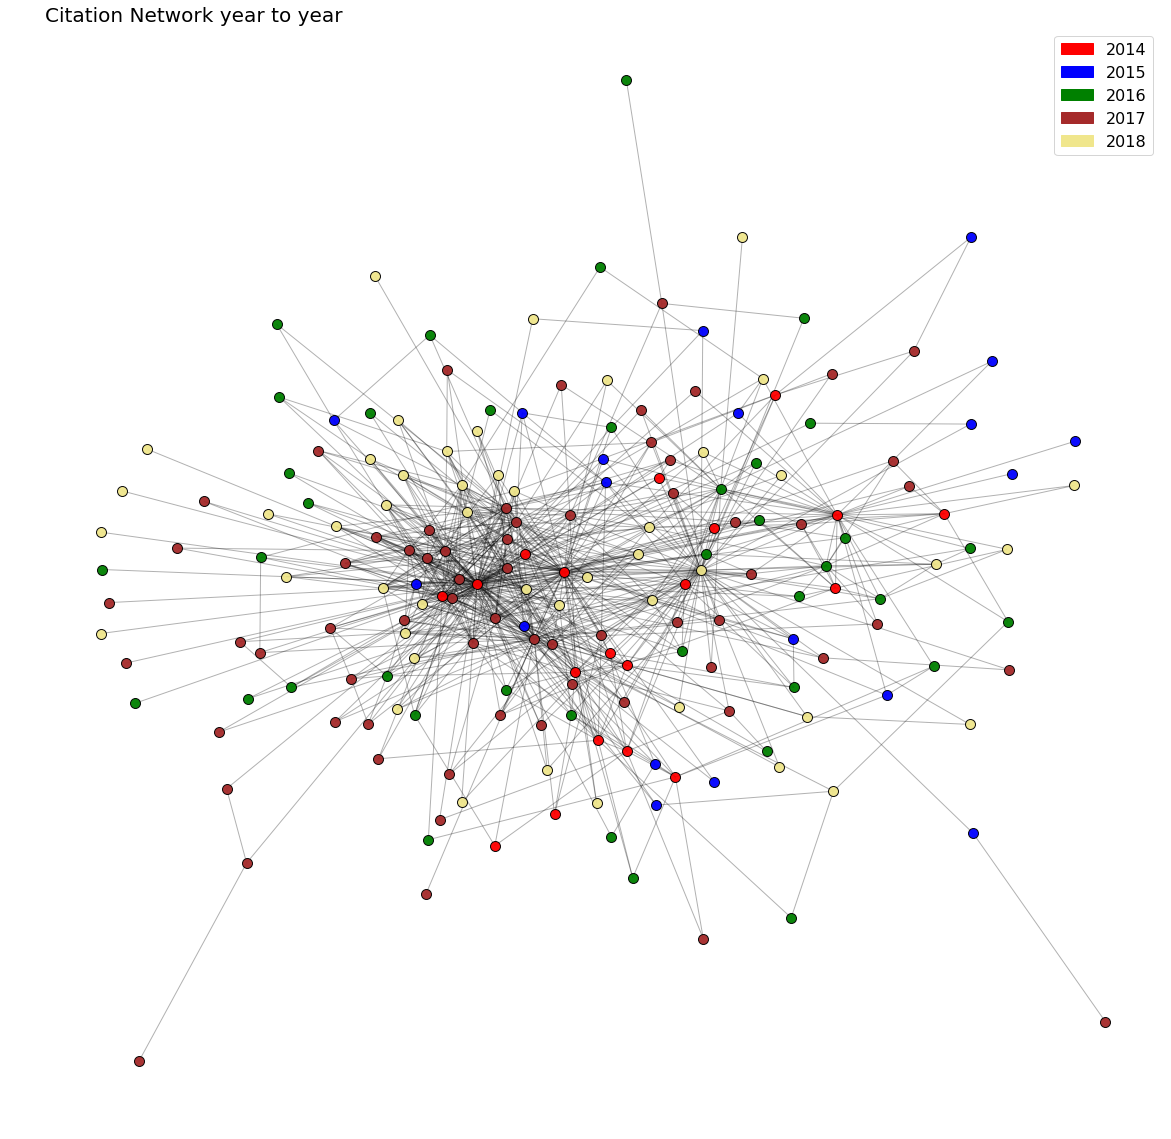

In [22]:
G14 = RC_2014.networkCitation(coreOnly=True)
G14u = G14.to_undirected()
G14u.remove_nodes_from(list(n for n in G14u.nodes() if n not in GAu_giant.nodes()))

G15 = RC_2015.networkCitation(coreOnly=True)
G15u = G15.to_undirected()
G15u.remove_nodes_from(list(n for n in G15u.nodes() if n not in GAu_giant.nodes()))

G16 = RC_2016.networkCitation(coreOnly=True)
G16u = G16.to_undirected()
G16u.remove_nodes_from(list(n for n in G16u.nodes() if n not in GAu_giant.nodes()))

G17 = RC_2017.networkCitation(coreOnly=True)
G17u = G17.to_undirected()
G17u.remove_nodes_from(list(n for n in G17u.nodes() if n not in GAu_giant.nodes()))

G18 = RC_2018.networkCitation(coreOnly=True)
G18u = G18.to_undirected()
G18u.remove_nodes_from(list(n for n in G18u.nodes() if n not in GAu_giant.nodes()))

plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw_networkx_nodes(G14u, layout, node_color= 'r', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G15u, layout, node_color= 'b', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G16u, layout, node_color= 'g', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G17u, layout, node_color= 'brown', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G18u, layout, node_color= 'khaki', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(GAu_giant, layout, edge_color='k',width=1, alpha=0.3)

plt.title("Citation Network year to year", fontsize=20, loc='left')
plt.legend(handles=[red_patch, blue_patch, green_patch, brown_patch,khaki_patch], prop={'size': 16})

plt.savefig("./Graphs/SF2019_CitationNetworkbyyear.png", bbox_inches="tight")
plt.show()

In [23]:
H14 = RC14.networkCitation(coreOnly=True)
H14 = H14.to_undirected()
H14.remove_edges_from(list(n for n in H14.nodes() if n not in GAu_giant.edges()))
H15 = RC15.networkCitation(coreOnly=True)
H15 = H15.to_undirected()
H15.remove_edges_from(list(n for n in H15.nodes() if n not in GAu_giant.edges()))
H16 = RC16.networkCitation(coreOnly=True)
H16 = H16.to_undirected()
H16.remove_edges_from(list(n for n in H16.nodes() if n not in GAu_giant.edges()))
H17 = RC17.networkCitation(coreOnly=True)
H17 = H17.to_undirected()
H17.remove_edges_from(list(n for n in H17.nodes() if n not in GAu_giant.edges()))
H18 = RC18.networkCitation(coreOnly=True)
H18 = H18.to_undirected()
H18.remove_edges_from(list(n for n in H18.nodes() if n not in GAu_giant.edges()))


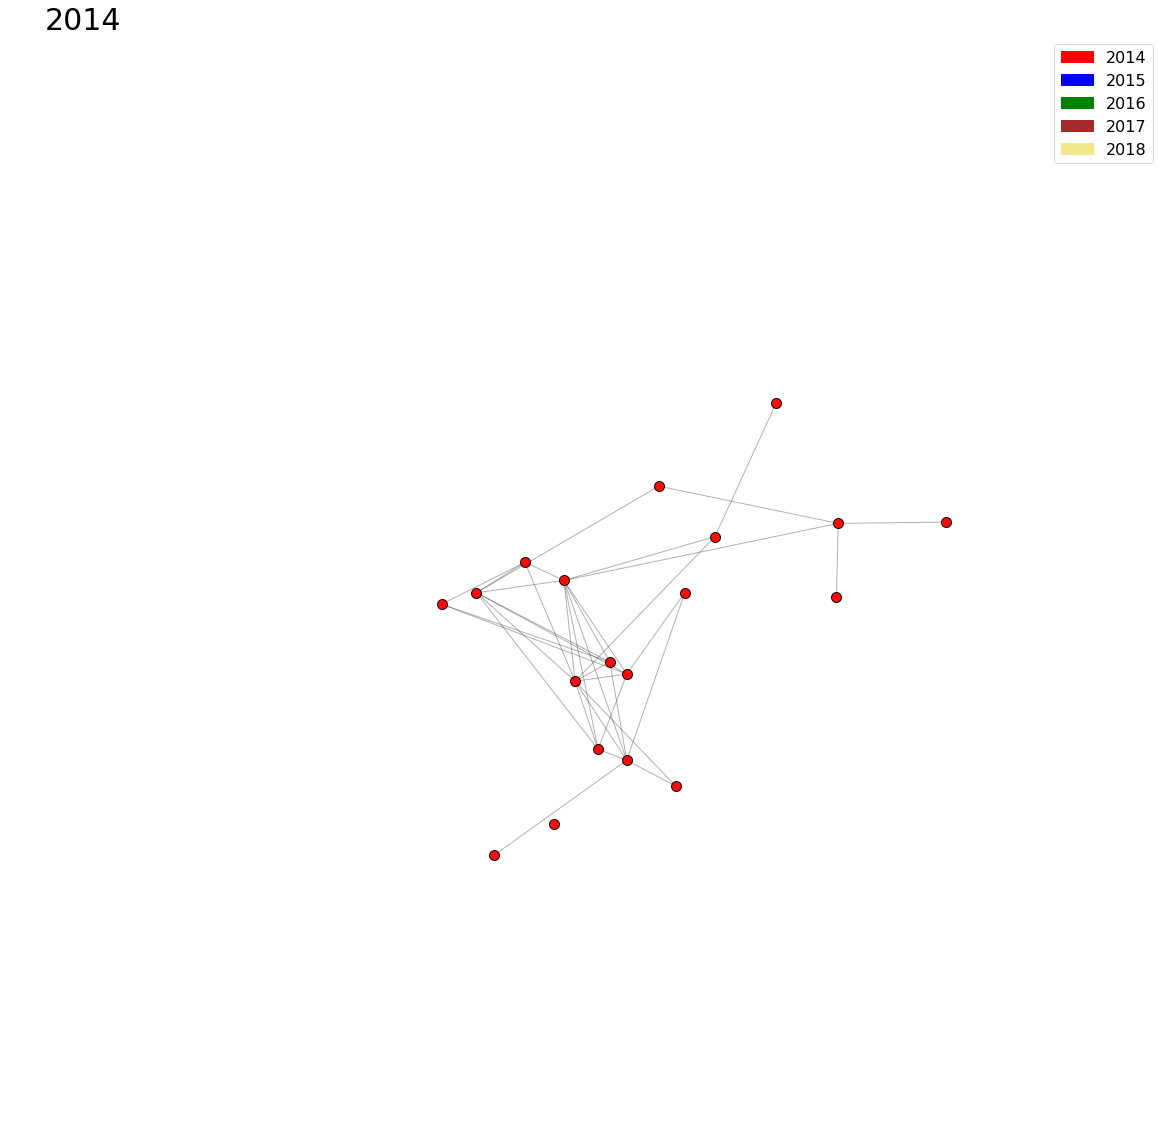

In [24]:
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw_networkx_nodes(G14u, layout, node_color= 'r', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(H14, layout, edge_color='k',width=1, alpha=0.3)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= 'white', node_size=100, edgecolors='white', alpha = 0.0) 
plt.title("2014", fontsize=30, loc='left')
plt.legend(handles=[red_patch, blue_patch, green_patch, brown_patch,khaki_patch], prop={'size': 16})
plt.savefig("Graphs/SF2019_CitationNetwork2014.png", bbox_inches="tight")
plt.show()

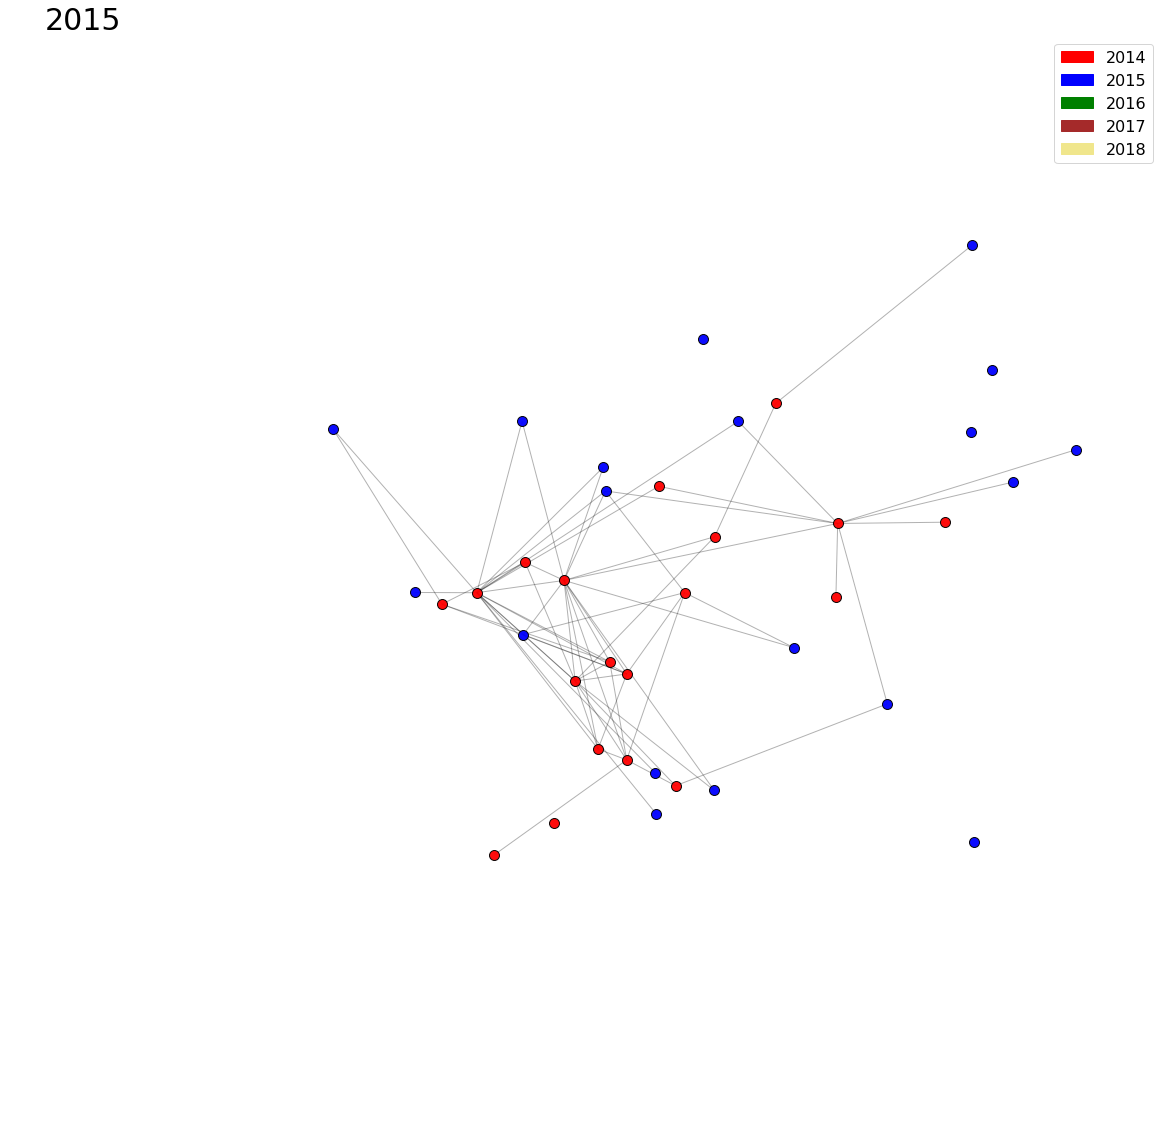

In [25]:
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw_networkx_nodes(G14u, layout, node_color= 'r', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G15u, layout, node_color= 'b', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(H15, layout, edge_color='k',width=1, alpha=0.3)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= 'white', node_size=100, edgecolors='white', alpha = 0.0) 
plt.title("2015", fontsize=30, loc='left')
plt.legend(handles=[red_patch, blue_patch, green_patch, brown_patch,khaki_patch], prop={'size': 16})
plt.savefig("Graphs/SF2019_CitationNetwork2015.png", bbox_inches="tight")
plt.show()

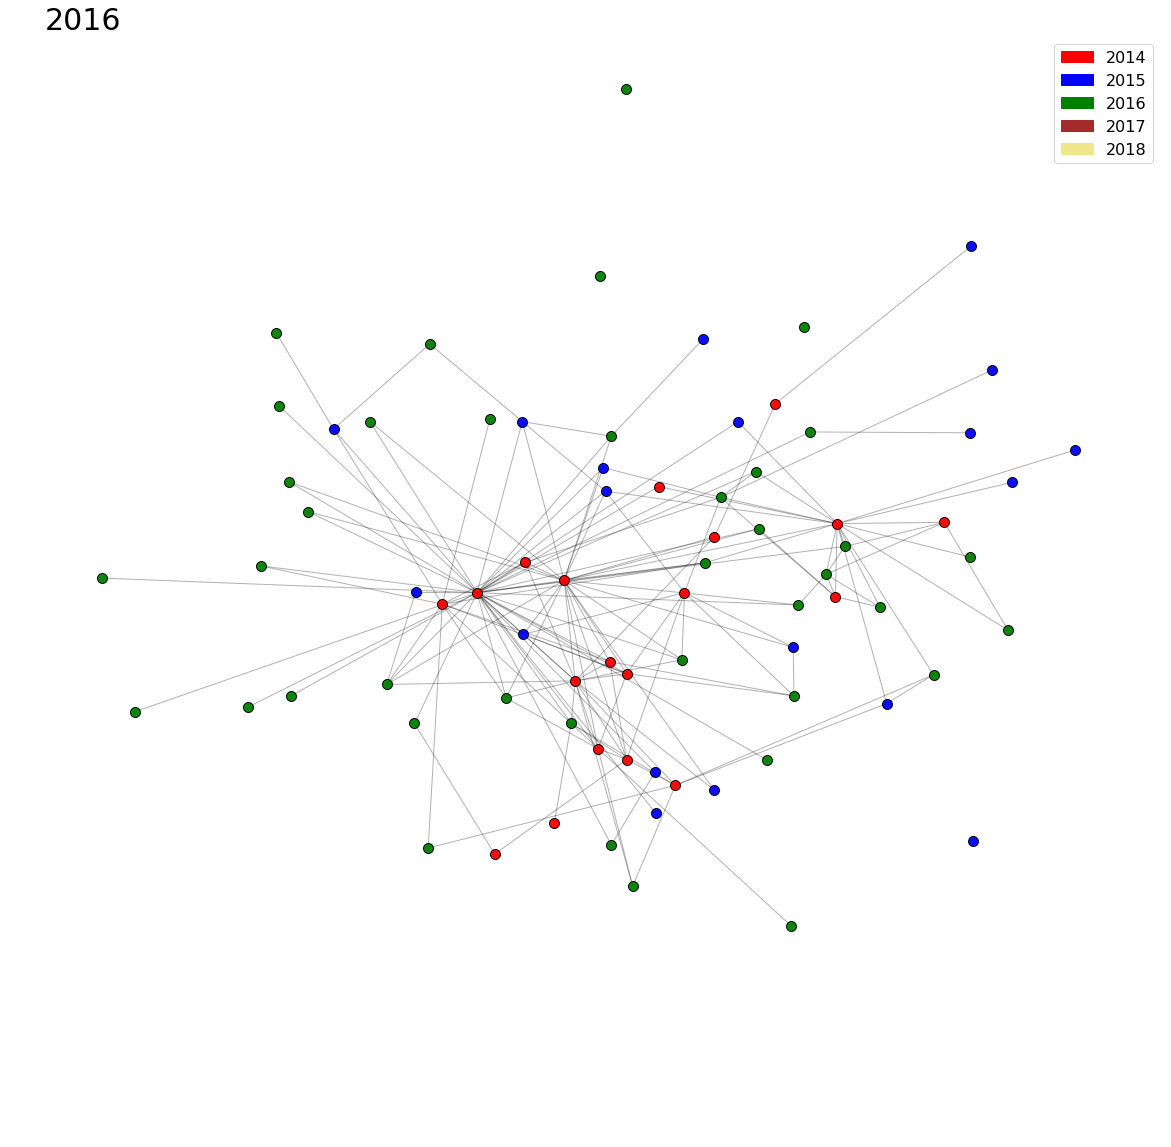

In [26]:
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw_networkx_nodes(G14u, layout, node_color= 'r', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G15u, layout, node_color= 'b', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G16u, layout, node_color= 'g', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(H16, layout, edge_color='k',width=1, alpha=0.3)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= 'white', node_size=100, edgecolors='white', alpha = 0.0) 
plt.title("2016", fontsize=30, loc='left')
plt.legend(handles=[red_patch, blue_patch, green_patch, brown_patch,khaki_patch], prop={'size': 16})
plt.savefig("Graphs/SF2019_CitationNetwork2016.png", bbox_inches="tight")
plt.show()

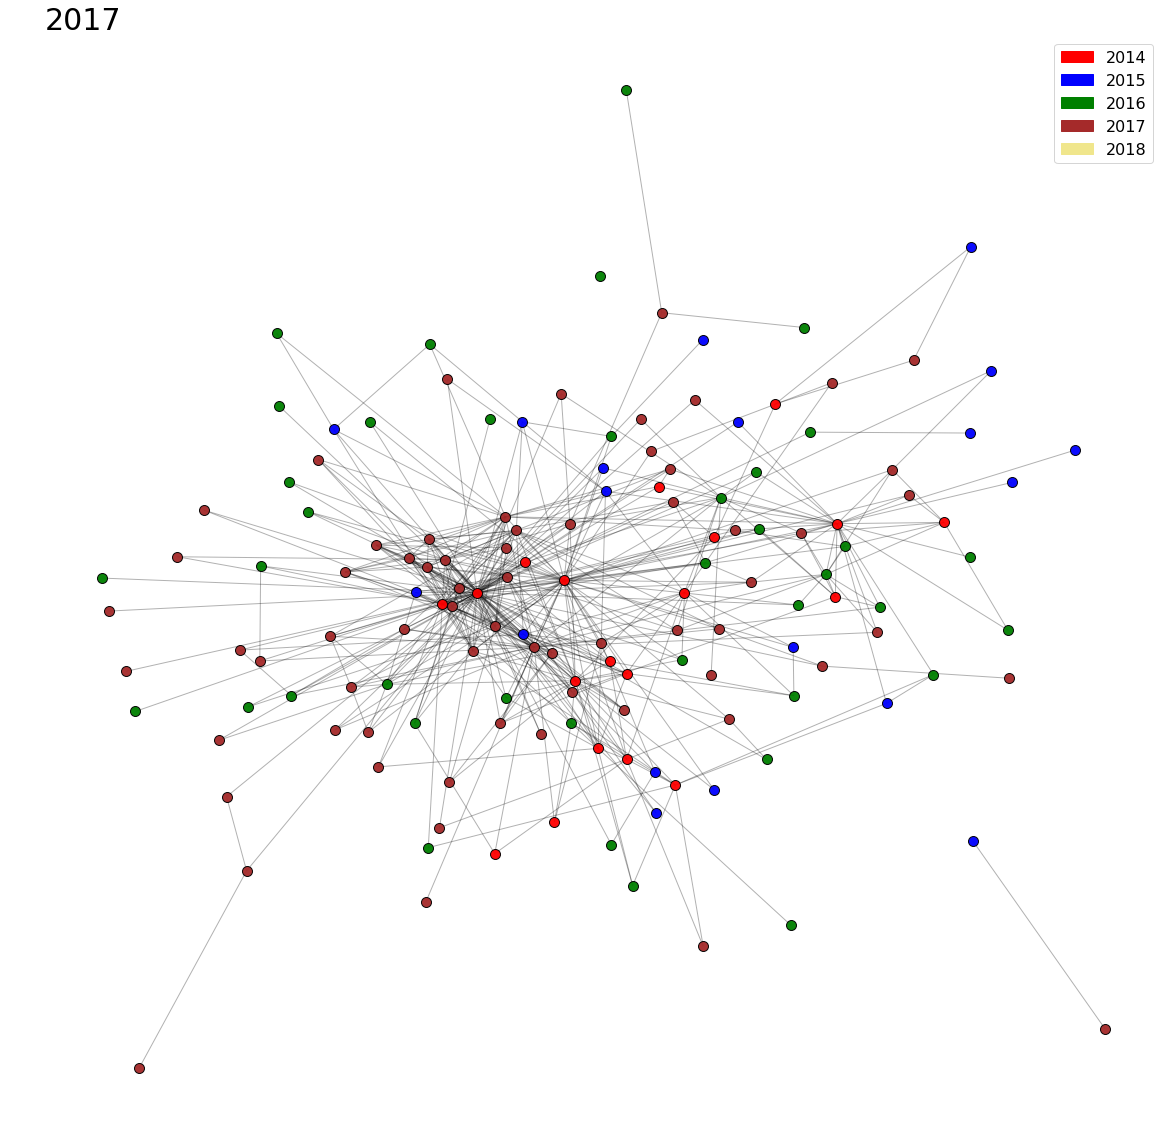

In [27]:
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw_networkx_nodes(G14u, layout, node_color= 'r', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G15u, layout, node_color= 'b', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G16u, layout, node_color= 'g', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G17u, layout, node_color= 'brown', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(H17, layout, edge_color='k',width=1, alpha=0.3)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= 'white', node_size=100, edgecolors='white', alpha = 0.0) 
plt.title("2017", fontsize=30, loc='left')
plt.legend(handles=[red_patch, blue_patch, green_patch, brown_patch,khaki_patch], prop={'size': 16})
plt.savefig("Graphs/SF2019_CitationNetwork2017.png", bbox_inches="tight")
plt.show()

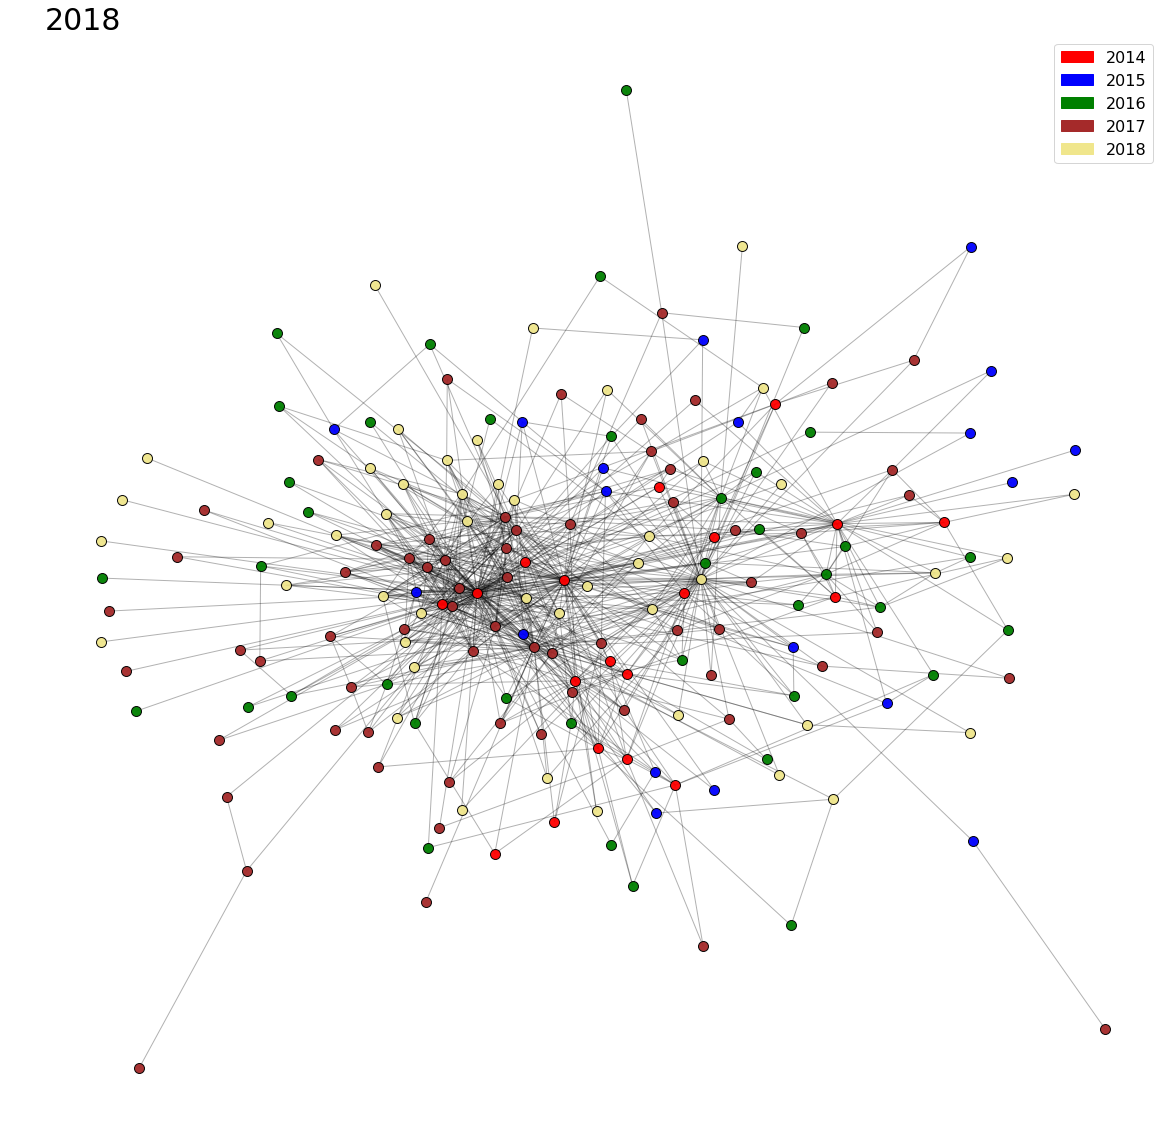

In [28]:
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw_networkx_nodes(G14u, layout, node_color= 'r', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G15u, layout, node_color= 'b', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G16u, layout, node_color= 'g', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G17u, layout, node_color= 'brown', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_nodes(G18u, layout, node_color= 'khaki', node_size=100, edgecolors='k', alpha = 0.95)
nx.draw_networkx_edges(H18, layout, edge_color='k',width=1, alpha=0.3)
nx.draw_networkx_nodes(GAu_giant, layout, node_color= 'white', node_size=100, edgecolors='white', alpha = 0.0) 
plt.title("2018", fontsize=30, loc='left')
plt.legend(handles=[red_patch, blue_patch, green_patch, brown_patch,khaki_patch], prop={'size': 16})
plt.savefig("Graphs/SF2019_CitationNetwork2018.png", bbox_inches="tight")
plt.show()